# Part I - (Prosper Loan Data)
## by (Yi Jian Ma Ma)

## In this file, I will explore the loan dataset, provided by Prosper, that contains 113,937 loans with 81 variables describing each loan.

In [2]:
# Import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Check for number of rows and columns contained in the dataset
df.shape

(113937, 81)

There are 113,937 rows of data and 81 columns in the dataset. Since there are many columns and variables in the dataset, the number of columns will be reduced to only those that are necessary for the investigation.

#### What is the structure of your dataset?

The structure of the dataset consists of 113,937 loans instances and 81 column variables

#### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in my dataset is "BorrowerAPR". I want to investigate what factors/variables play a major influence impacting a borrower's APR.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features in the dataset that I think will help support my investigation into "BorrowerAPR" are the following:

> <b>Term-</b> The length of the loan expressed in months.

> <b>EmploymentStatus-</b> The employment status of the borrower at the time they posted the listing.

> <b>IsBorrowerHomeowner-</b> A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

> <b>CurrentCreditLines-</b> Number of current credit lines at the time the credit profile was pulled.

> <b>DebtToIncomeRatio -</b> The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001

> <b>StatedMonthlyIncome-</b> The monthly income the borrower stated at the time the listing was created.

> <b>IncomeVerifiable-</b>The borrower indicated they have the required documentation to support their income.

> <b>LoanOriginalAmount-</b>The originiation amount of the loan

In [15]:
# Create subset of data baxed on the features(s) of interest identified above
subset_df = df[['BorrowerAPR','Term','EmploymentStatus','IsBorrowerHomeowner','CurrentCreditLines','DebtToIncomeRatio',
'StatedMonthlyIncome','IncomeVerifiable','TotalProsperLoans','LoanOriginalAmount']]
subset_df.head()

,BorrowerAPR,Term,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,TotalProsperLoans,LoanOriginalAmount
0,0.16516,36,Self-employed,True,5.0,0.17,3083.333333,True,NaN,9425
1,0.12016,36,Employed,False,14.0,0.18,6125.000000,True,NaN,10000
2,0.28269,36,Not available,False,NaN,0.06,2083.333333,True,NaN,3001
3,0.12528,36,Employed,True,5.0,0.15,2875.000000,True,NaN,10000
4,0.24614,36,Employed,True,19.0,0.26,9583.333333,True,1.0,15000


Based on an initial look at the subset data, it seems to be cleaner without all 81 columns. Going forward, I will continue the data wrangling process and data exploratory process using this subset of data.

In [18]:
# Check datatypes
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   BorrowerAPR          113912 non-null  float64
 1   Term                 113937 non-null  int64  
 2   EmploymentStatus     111682 non-null  object 
 3   IsBorrowerHomeowner  113937 non-null  bool   
 4   CurrentCreditLines   106333 non-null  float64
 5   DebtToIncomeRatio    105383 non-null  float64
 6   StatedMonthlyIncome  113937 non-null  float64
 7   IncomeVerifiable     113937 non-null  bool   
 8   TotalProsperLoans    22085 non-null   float64
 9   LoanOriginalAmount   113937 non-null  int64  
dtypes: bool(2), float64(5), int64(2), object(1)
memory usage: 7.2+ MB


Term and EmploymentStatus should be converted to 'category'. It also appears that there are NaN values in 'CurrentCreditLines', 'DebtToIncomeRatio', and 'TotalProsperLoans'. I will investigate those further after assessing all the data.

In [21]:
# Check summary statistics of the data
subset_df.describe(include = 'all')

,BorrowerAPR,Term,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,TotalProsperLoans,LoanOriginalAmount
count,113912.000000,113937.000000,111682,113937,106333.000000,105383.000000,1.139370e+05,113937,22085.000000,113937.00000
unique,NaN,NaN,8,2,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,Employed,True,NaN,NaN,NaN,True,NaN,NaN
freq,NaN,NaN,67322,57478,NaN,NaN,NaN,105268,NaN,NaN
mean,0.218828,40.830248,NaN,NaN,10.317192,0.275947,5.608026e+03,NaN,1.421100,8337.01385
std,0.080364,10.436212,NaN,NaN,5.457866,0.551759,7.478497e+03,NaN,0.764042,6245.80058
min,0.006530,12.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,NaN,0.000000,1000.00000
25%,0.156290,36.000000,NaN,NaN,7.000000,0.140000,3.200333e+03,NaN,1.000000,4000.00000
50%,0.209760,36.000000,NaN,NaN,10.000000,0.220000,4.666667e+03,NaN,1.000000,6500.00000
75%,0.283810,36.000000,NaN,NaN,13.000000,0.320000,6.825000e+03,NaN,2.000000,12000.00000


Callouts based on summary statistics of data
- BorrowerAPR - Min value is 0.006530. This seems like an outlier considering that 25% quartile .15. This will be need to be investigated further.
- CurrentCreditLines - Max value is 59. This seems like an outlier considering that 75% quartile is 13. This will need to be investigated further.
- OpenRevolvingAccounts - Max value is 51. This seems like an outlier considering that 75% quartile is 9. This will need to be investigated further.
- DebtToIncomeRatio - Max value is 10. This seems like an outlier considering that 75% quartile is .32. This will need to be investigated further.
- TotalProsperLoans - There are only 22,085 instances of data. Roughly 80% of values are null. This feature will likely be removed as part of the analysis
- LoanOriginalAmount - Max value is 35,000. This seems like an outlier considering that 75% quartile is 12,000. This will need to be investigated further

In [24]:
#Remove 'TotalProsperLoan' feature since roughly 80% of values are missing
subset_df.drop(columns=['TotalProsperLoans'], inplace=True)
subset_df.head()

C:\Users\yijia\AppData\Local\Temp\ipykernel_9652\3913393147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.drop(columns=['TotalProsperLoans'], inplace=True)


,BorrowerAPR,Term,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount
0,0.16516,36,Self-employed,True,5.0,0.17,3083.333333,True,9425
1,0.12016,36,Employed,False,14.0,0.18,6125.000000,True,10000
2,0.28269,36,Not available,False,NaN,0.06,2083.333333,True,3001
3,0.12528,36,Employed,True,5.0,0.15,2875.000000,True,10000
4,0.24614,36,Employed,True,19.0,0.26,9583.333333,True,15000


In [26]:
# Investigate missing values in DebtToIncomeRatio
subset_df[subset_df['BorrowerAPR'].isna()]

# Remove missing value rows from BorrowerAPR column as this is the main feature in our analysis
subset_df.dropna(subset=['BorrowerAPR'], inplace=True)

# Check counts of missing values
subset_df.isna().sum()

C:\Users\yijia\AppData\Local\Temp\ipykernel_9652\2632326984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.dropna(subset=['BorrowerAPR'], inplace=True)


BorrowerAPR               0
Term                      0
EmploymentStatus       2230
IsBorrowerHomeowner       0
CurrentCreditLines     7579
DebtToIncomeRatio      8554
StatedMonthlyIncome       0
IncomeVerifiable          0
LoanOriginalAmount        0
dtype: int64

In [28]:
# Investigate missing values in DebtToIncomeRatio
subset_df[subset_df['DebtToIncomeRatio'].isna()]

# Check if there are instances where DebtToIncomeRation = 0
subset_df[subset_df['DebtToIncomeRatio'] == 0]

# Remove missing value rows from DebtToIncomeRatio column. Don't want to fill it in with 0 or the mean since there are different implications whether it is 0 or mean value
subset_df.dropna(subset=['DebtToIncomeRatio'], inplace=True)

# Check counts of missing values
subset_df.isna().sum()

C:\Users\yijia\AppData\Local\Temp\ipykernel_9652\3508190246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.dropna(subset=['DebtToIncomeRatio'], inplace=True)


BorrowerAPR               0
Term                      0
EmploymentStatus       2201
IsBorrowerHomeowner       0
CurrentCreditLines     7455
DebtToIncomeRatio         0
StatedMonthlyIncome       0
IncomeVerifiable          0
LoanOriginalAmount        0
dtype: int64

In [30]:
# Investigate missing values in DebtToIncomeRatio
subset_df[subset_df['EmploymentStatus'].isna()]

# Possible values in EmploymentStatus
subset_df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [32]:
# Investigate missing values in CurrentCreditLines
subset_df[subset_df['CurrentCreditLines'].isna()]

# Check if there are instances where CurrentCreditLines = 0
subset_df[subset_df['CurrentCreditLines'] == 0]

# Remove missing value rows from CurrentCreditLines column. Don't want to fill it in with 0 or the mean since there are different implications whether it is 0 or mean value
subset_df.dropna(subset=['CurrentCreditLines'], inplace=True)

# Check counts of missing values
subset_df.isna().sum()

C:\Users\yijia\AppData\Local\Temp\ipykernel_9652\1890399505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.dropna(subset=['CurrentCreditLines'], inplace=True)


BorrowerAPR            0
Term                   0
EmploymentStatus       0
IsBorrowerHomeowner    0
CurrentCreditLines     0
DebtToIncomeRatio      0
StatedMonthlyIncome    0
IncomeVerifiable       0
LoanOriginalAmount     0
dtype: int64

In [34]:
# Once all missing values are removed, check number of instances and columns
subset_df.shape

(97903, 9)

We will now be working with 97,903 instances of loan data and 10 columns

In [37]:
# Convert 'Term' and 'EmploymentStatus' into categorical variables
subset_df['Term'] = subset_df['Term'].astype('category')
subset_df['EmploymentStatus'] = subset_df['EmploymentStatus'].astype('category') 

subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97903 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   BorrowerAPR          97903 non-null  float64 
 1   Term                 97903 non-null  category
 2   EmploymentStatus     97903 non-null  category
 3   IsBorrowerHomeowner  97903 non-null  bool    
 4   CurrentCreditLines   97903 non-null  float64 
 5   DebtToIncomeRatio    97903 non-null  float64 
 6   StatedMonthlyIncome  97903 non-null  float64 
 7   IncomeVerifiable     97903 non-null  bool    
 8   LoanOriginalAmount   97903 non-null  int64   
dtypes: bool(2), category(2), float64(4), int64(1)
memory usage: 4.9 MB


C:\Users\yijia\AppData\Local\Temp\ipykernel_9652\809841408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Term'] = subset_df['Term'].astype('category')
C:\Users\yijia\AppData\Local\Temp\ipykernel_9652\809841408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['EmploymentStatus'] = subset_df['EmploymentStatus'].astype('category')


## Univariate Exploration

The question that I will be trying to answer in the Univariate Exploration is to garner a fundamental understanding of the all the different features by itself. By understanding the distribution and counts of the variables will give me an initial view of what the story the variable is telling me and whether and adjustments will be needed to be made to the variables (e.g., whether to exclude the variable from analysis, transformations, distribution ,outliers, etc.)

The first variable to explore is BorrowerAPR. A histogram will be created to show a distribution of where most APRs fall

In [41]:
# To explore the variables, create a defintion for creating histogram plots as part of univariate variable exploration
def histogram_plot(xvar, xlabelname, ylabelname, titlename, dataframe):
    df_plot = plt.hist(data=dataframe, x=xvar, bins=bins)
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.title(titlename);
    return df_plot

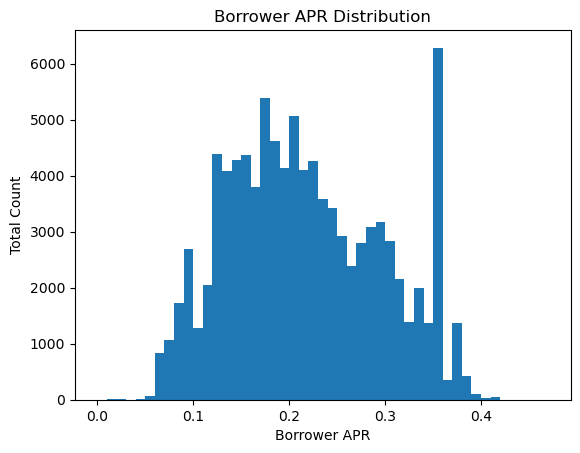

In [43]:
# Create histogram for 'BorrowerAPR' to show the counts distribution of where most APRs fall
bins = np.arange(0, subset_df['BorrowerAPR'].max()+0.05, 0.01)
histogram_plot('BorrowerAPR', 'Borrower APR', 'Total Count', 'Borrower APR Distribution',subset_df);

<b>Observation:</b> BorrowerAPR appears to have a bimodal distribution, with the first peak around ~0.2 APR, and then another peak around ~0.35 APR. It also appears that max value for BorrowerAPR is around ~0.42.

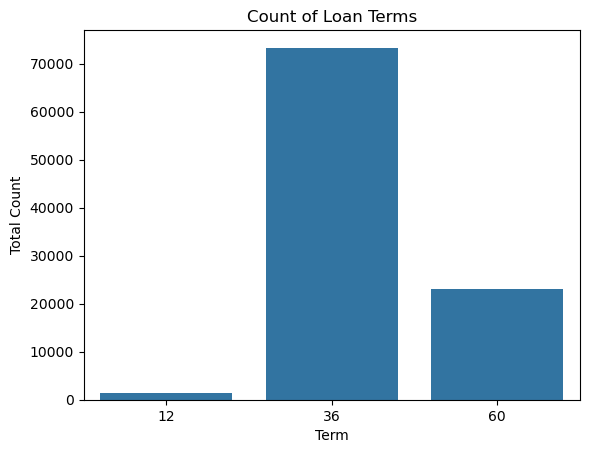

In [46]:
# Create countplot for 'Term' to show the counts of the different type of loan terms
sns.countplot(data = subset_df, x = 'Term', color = 'tab:blue')
plt.title('Count of Loan Terms')
plt.ylabel('Total Count');

<b>Observation:</b> There are three types of loan terms: 12 months, 36 months, and 36 months. Majority of loan instances have a 36 month loan term.

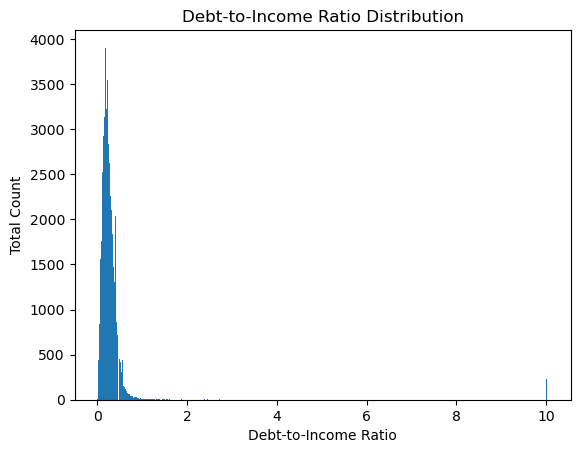

In [49]:
# Create histogram for 'DebtToIncomeRatio' to show the counts distribution of where most ratios fall
bins = np.arange(0, subset_df['DebtToIncomeRatio'].max()+0.05, 0.01)
histogram_plot('DebtToIncomeRatio', 'Debt-to-Income Ratio', 'Total Count', 'Debt-to-Income Ratio Distribution',subset_df);

<b>Observation:</b> Based on the histogram, there appears to be an outlier for the Debt-to-Income ratio around ~10. Next step will be to create a box and whisker plot to see if there are more outliers.

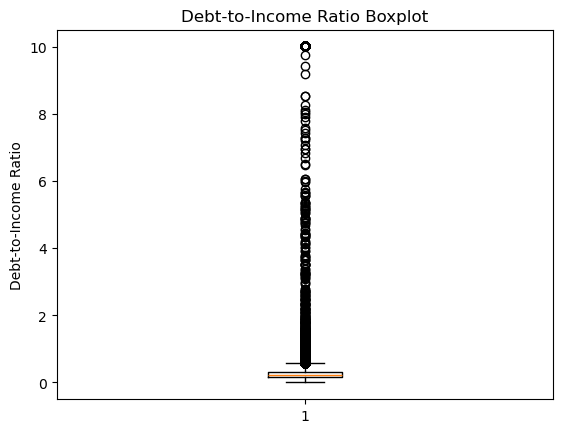

In [52]:
# Create a box-whisker plot to see if there's other outliers for DebtToIncomeRatio
plt.boxplot(subset_df['DebtToIncomeRatio'])
plt.title('Debt-to-Income Ratio Boxplot')
plt.ylabel('Debt-to-Income Ratio');

<b>Observation:</b> The box and whisker plot shows that there are lot of outliers outside the box and whisker.

In [55]:
subset_df.head()

,BorrowerAPR,Term,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount
0,0.16516,36,Self-employed,True,5.0,0.17,3083.333333,True,9425
1,0.12016,36,Employed,False,14.0,0.18,6125.000000,True,10000
3,0.12528,36,Employed,True,5.0,0.15,2875.000000,True,10000
4,0.24614,36,Employed,True,19.0,0.26,9583.333333,True,15000
5,0.15425,60,Employed,True,21.0,0.36,8333.333333,True,15000


EmploymentStatus
Employed         65896
Full-time        25590
Other             3526
Self-employed     1092
Part-time          969
Retired            735
Not employed        95
Name: count, dtype: int64


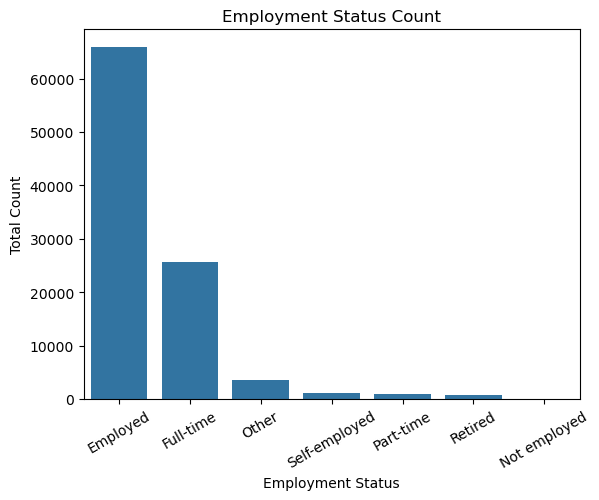

In [57]:
# Create bar graph for 'EmploymentStatus' to show the counts of the different employment status
order = subset_df['EmploymentStatus'].value_counts().index
sns.countplot(data = subset_df, x = 'EmploymentStatus', order=order, color = 'tab:blue')
plt.xticks(rotation = 30)
plt.title('Employment Status Count')
plt.xlabel('Employment Status')
plt.ylabel('Total Count');
print(subset_df['EmploymentStatus'].value_counts())

<b>Observation:</b> Most people who have a loan are 'employed'. Then followed by 'Full-time'. However, those who are 'Full-time' and 'Part-Time' can technically be considered as 'Employed'. For the most part, people who are approved of loans have a job. People who are retired or have part-time make a small fraction of people who were approved of a loan.

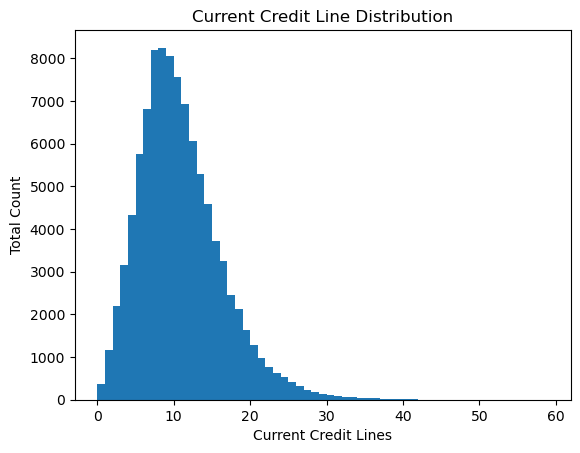

In [60]:
# Create histogram for 'CurrentCreditLines' to show the counts distribution of where most APRs fall
bins = np.arange(0, subset_df['CurrentCreditLines'].max()+.1, 1)
histogram_plot('CurrentCreditLines', 'Current Credit Lines', 'Total Count', 'Current Credit Line Distribution',subset_df);

<b>Observation:</b> The distribution for currrent credit lines appear to be unimodal, right-skewed. Most people with loans seem to have close to 10 credit lines

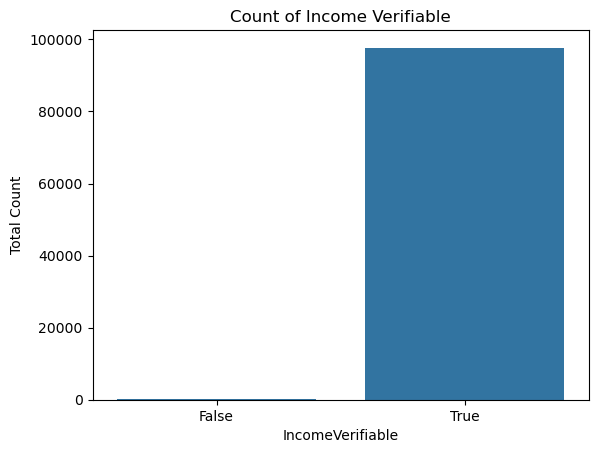

In [63]:
# Create countplot for 'IncomeVerifiable' to show the counts of the different type of loan terms
sns.countplot(data = subset_df, x = 'IncomeVerifiable', color = 'tab:blue')
plt.title('Count of Income Verifiable')
plt.ylabel('Total Count');

<b>Observation:</b> Most people with a loan were able to have their income verified. A small portion of people with a Prosper loan did not have their income verified.

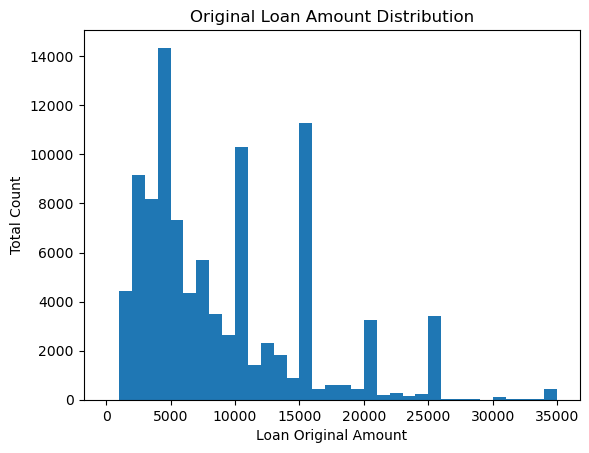

In [66]:
# Create histogram for 'LoanOriginalAmount' to show the counts distribution of where most APRs fall
bins = np.arange(0, subset_df['LoanOriginalAmount'].max()+500, 1000)
histogram_plot('LoanOriginalAmount', 'Loan Original Amount', 'Total Count', 'Original Loan Amount Distribution',subset_df);

<b>Observation:</b> Based on the histogram, it seems loan original amount has a multi-modal distribution, with multiple loans in the following categories: 5000, 10000, 15000, 20000, 25000, and 35000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> <b>BorrowerAPR</b> - BorrowerAPR appears to have a bimodal distribution, with the first peak around ~0.2 APR, and then another peak around ~0.35 APR. It also appears that max value for BorrowerAPR is around ~0.42. No transformations were done


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> <b>DebtToIncomeRatio</b> - Based on the histogram, there appears to be an outlier for the Debt-to-Income ratio around ~10. I didn't adjust the data, but I created a box-and-whisker plot to identify any potential outliers since there are a lot of ratios that are greater than 1.
 
> <b>Term</b> - There are three types of loan terms: 12 months, 36 months, and 36 months. Majority of loan instances have a 36 month loan term.

> <b>EmploymentStatus</b> - Most people who have a loan are 'employed'. Then followed by 'Full-time'. However, those who are 'Full-time' and 'Part-Time' can technically be considered as 'Employed'. For the most part, people who are approved of loans have a job. People who are retired or have part-time make a small fraction of people who were approved of a loan. Although I didn't adjust the data, I would have have combined the "Full-Time", "Part-Time" under the "Employed" category

> <b>CurrentCreditLines</b> - The distribution for currrent credit lines appear to be unimodal, right-skewed. Most people with loans seem to have close to 10 credit lines

> <b>IncomeVerifiable</b> - Most people with a loan were able to have their income verified. A small portion of people with a Prosper loan did not have their income verified.

> <b>LoanOriginalAmount</b>Based on the histogram, it seems loan original amount has a multi-modal distribution, with multiple loans in the following categories: 5000, 10000, 15000, 20000, 25000, and 35000.

## Bivariate Exploration

> Now that the univariate exploration of the variables are done, in this section, I will investigate relationships between pairs of variables in my data. The question that I want to answer here is to see what relationships standout, especially what variables have a relationship with my variable of interest (BorrowerAPR). Additionally, I also want to see if there are any other relationships that exists with variables outside fo the variable of interest.

## Scatterplot
I want to examine the relationship between the BorrowerAPR with the numerical variables: 'CurrentCreditLines','StatedMonthlyIncome' 'DebtToIncomeRatio', 'LoanOriginalAmount'.

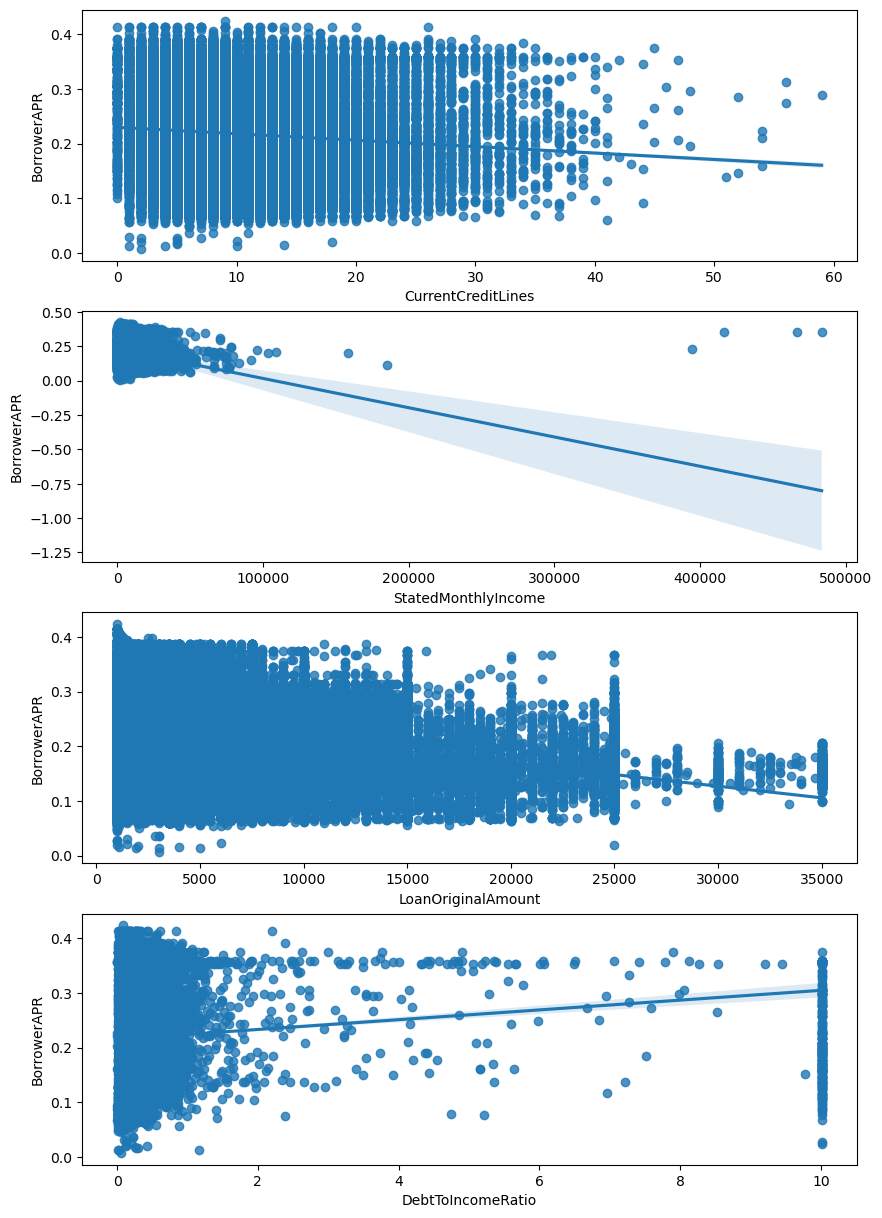

In [72]:
# Set size for all 4 plots
plt.figure(figsize = [10, 15])

# Create scatterplot between BorrowerARP vs CurrentCreditLines
plt.subplot(4,1,1)
sns.regplot(data = subset_df, x = 'CurrentCreditLines', y = 'BorrowerAPR');

# Create scatterplot between BorrowerARP vs StatedMonthlyIncome
plt.subplot(4,1,2)
sns.regplot(data = subset_df, x = 'StatedMonthlyIncome', y = 'BorrowerAPR');

# Create scatterplot between BorrowerARP vs LoanOriginalAmount
plt.subplot(4,1,3)
sns.regplot(data = subset_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR');

# Create scatterplot between BorrowerARP vs DebtToIncomeRatio
plt.subplot(4,1,4)
sns.regplot(data = subset_df, x = 'DebtToIncomeRatio', y = 'BorrowerAPR');

<b>Observation: </b>

> <b>CurrentCreditLines - </b> Based on the scatterplot, it apperas there is no correlation between BorrowerAPR and the number of current credit lines. This is because a lot of the points regardless of the number of credit lines, the borrowerAPR varies across the y-axis.For example, when CurrentCreditLines is 10, a lot of the points fall between where BorrowerApr is betwee 0.15 to 0.40. 

> <b>Stated Monthly Income - </b> Based on the scatterplot, it is hard to conclude there is a relationship/correlation between BorrowerAPR and the stated monthly income. This is because of outliers for large stated monthly income impacted the axis. I will create a heatmap with correlation values later on to investigate further into this.

> <b>Loan Original Amount- </b> Based on the scatterplot, it appears there is a slight negative correlation between BorrowerAPR and the loan original amount. When loanOrigianl amount is between 0-25000, borrowerAPR varies across the y-axis. However, when LoanOriginalAmount is between 25000-35000, the negative relationship is somewhat more visible. As the LoanOriginalAmount increases, BorrowerAPR increases. But this seems to go against the negative trendline. I will create a heatmap with correlation values to investigate further into this as well.

> <b>Debt To Income Ratio- </b> Based on the scatterplot, there is a positive trendline between DebtToIncomeRatio and BorrowerAPR. However because a lot of the ratio points are less than ~2, the big-outlier of DebtToIncomeRatio=10 significantly impacted the scatterplot. It may be worth to remove outliers from the DebtToIncomeRatio and plot a new scatterplot between BorrowerAPR and DebtToIncomeRatio

### Box Plots

I want to examine the relationship between the BorrowerAPR with the categorical variables: 'Term' and 'EmploymentStatus', 'IsBorrowerHomeowner'

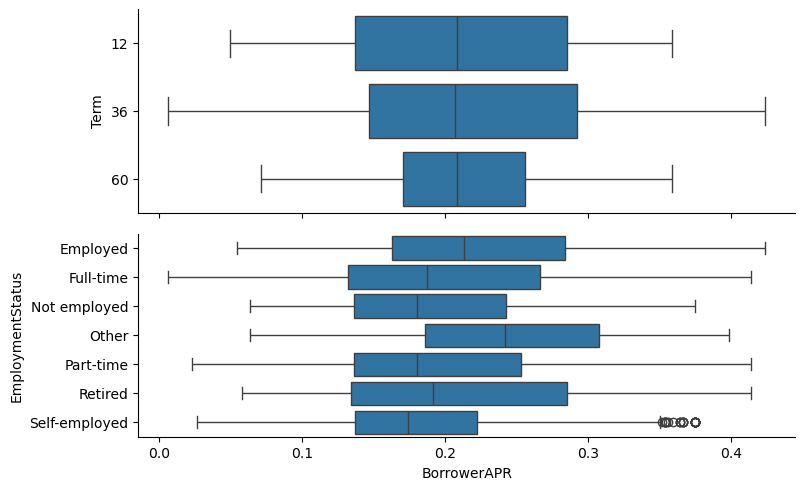

In [75]:
# Create boxplot for Term and Employment status versus BorrowerAPR
box_grid = sns.PairGrid(data = subset_df, x_vars ='BorrowerAPR', y_vars = ['Term', 'EmploymentStatus'])
box_grid.map(sns.boxplot, color = 'tab:blue')
box_grid.fig.set_size_inches(10,5);

<b>Observation:</b> 

> <b>Term</b> - Based on the box-and-whisker for Term versus BorrowerAPR, regardless of the term, the median BorrowerAPR apperas to be around ~0.22. For term 12months and 36months, they have a similar distribution in the sense that the 75%quartile of the BorrowerAPR is approx between 0.25-0.30 APR. Only the 60month term 75% quartile has a lower APR.

> <b>Employment Status</b> - An interesting observation from the EmploymentStatus box-and-whisker plot is that full-time, not-employed, part-time, retired, and self employed have similar median values ~0.15-0.20, whereas those who are "Employed" or "Other" have a median borrowerAPR that is greater than 0.20. I would have expected to see Emplyoed and Fulltime to have similar median as both categories are similar. Nonetheless, the box and whisker for the two does seem to have a similar distribution, despite the median being different. Another noticeable characteristic is that for self-employed, they have more outliers where BorrowerAPR is between 0.35-0.4, but for the other employment status, 0.3-0.40 APRs are not outliers. 

### Heatmap

I will use a heatmap to further explore the correlation between BorrowerAPR and numerical variables as the scatterplots previously didn't seem to provide too much insights.

<Axes: >

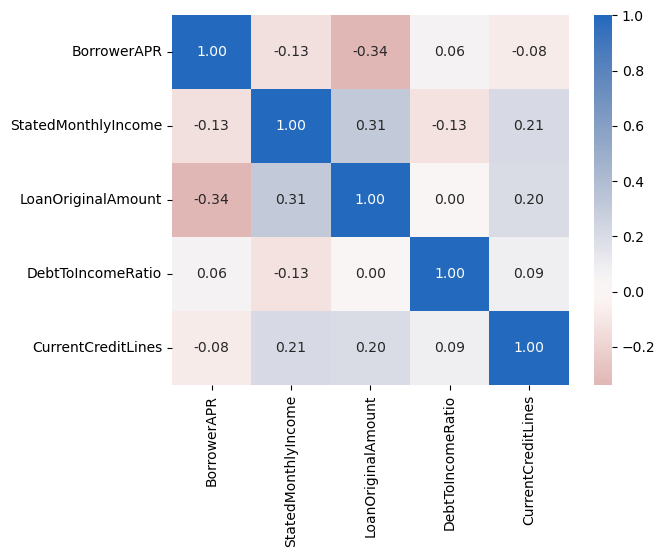

In [78]:
# List of numerical values to focus on for the analysis
num_variables = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio','CurrentCreditLines']

# Create heatmap based on the numerical variables
sns.heatmap(subset_df[num_variables].corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0)

<b>Observation:</b> Overall, BorrowerAPR doesn't seem to have a strong correlation with many of the numerical variables as all of the correlation values are less than 0.5 (positive correlation) and greater than -0.5 (negative correlation). In order for the variables to have strong correlation, the R value should be close to either 1 or -1, but it doesn't seem like that is the case based on the heatmap. Additionally, based on the heatmap, there is a small negative correlation between BorrowerAPR and LoanOriginalAmount. As the original loan amount increases, BorrowerAPR decreases. The heatmap also indicate a small positive relationship between LoanOriginalAmount and StatedMonthlyIncome. This makes some sense as the monthly income of a borrwer increases, they can also have a bigger loan amount. StatedMonthlyIncome and DebtToIncomeRatio also has a negative correlation, however it is a very small negative correlation (-0.13). As StatedMonthlyIncome increases, the debt-to-income ratio decreases. Further analysis will need to be conducted to determine whether the correlation is significant. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> <b>CurrentCreditLines - </b> Based on the scatterplot, it appears there is no correlation between BorrowerAPR and the number of current credit lines. This is because a lot of the points regardless of the number of credit lines, the borrowerAPR varies across the y-axis.For example, when CurrentCreditLines is 10, a lot of the points fall between where BorrowerApr is betwee 0.15 to 0.40. 

> <b>Stated Monthly Income - </b> Based on the scatterplot, it is hard to conclude there is a relationship/correlation between BorrowerAPR and the stated monthly income. This is because of outliers for large stated monthly income impacted the axis. I will create a heatmap with correlation values later on to investigate further into this.

> <b>Loan Original Amount- </b> Based on the scatterplot, it appears there is a slight negative correlation between BorrowerAPR and the loan original amount. When loanOrigianl amount is between 0-25000, borrowerAPR varies across the y-axis. However, when LoanOriginalAmount is between 25000-35000, the negative relationship is somewhat more visible. As the LoanOriginalAmount increases, BorrowerAPR increases. But this seems to go against the negative trendline. I will create a heatmap with correlation values to investigate further into this as well.

> <b>Debt To Income Ratio- </b> Based on the scatterplot, there is a positive trendline between DebtToIncomeRatio and BorrowerAPR. However because a lot of the ratio points are less than ~2, the big-outlier of DebtToIncomeRatio=10 significantly impacted the scatterplot. It may be worth to remove outliers from the DebtToIncomeRatio and plot a new scatterplot between BorrowerAPR and DebtToIncomeRatio

> <b>Term</b> - Based on the box-and-whisker for Term versus BorrowerAPR, regardless of the term, the median BorrowerAPR apperas to be around ~0.22. For term 12months and 36months, they have a similar distribution in the sense that the 75%quartile of the BorrowerAPR is approx between 0.25-0.30 APR. Only the 60month term 75% quartile has a lower APR.

> <b>Employment Status</b> - An interesting observation from the EmploymentStatus box-and-whisker plot is that full-time, not-employed, part-time, retired, and self employed have similar median values ~0.15-0.20, whereas those who are "Employed" or "Other" have a median borrowerAPR that is greater than 0.20. I would have expected to see Emplyoed and Fulltime to have similar median as both categories are similar. Nonetheless, the box and whisker for the two does seem to have a similar distribution, despite the median being different. Another noticeable characteristic is that for self-employed, they have more outliers where BorrowerAPR is between 0.35-0.4, but for the other employment status, 0.3-0.40 APRs are not outliers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Based on the heatmap, it indicates a small positive relationship between LoanOriginalAmount and StatedMonthlyIncome. This makes some sense as the monthly income of a borrwer increases, they can also have a bigger loan amount. StatedMonthlyIncome and DebtToIncomeRatio also has a negative correlation, however it is a very small negative correlation (-0.13). As StatedMonthlyIncome increases, the debt-to-income ratio decreases. Further analysis will need to be conducted to determine whether the correlation is significant. 

## Multivariate Exploration

In this section, I will explore the interactions of 3 other variables with my variable of interest "BorrowerAPR". The question that I am trying to answer here is to see whether my categorical variables ('EmploymentStatus' and 'Term') interacts with each other and have any effect on BorrowerAPR and its interaction with some of the numerical variables. As seen in the Bivariate Exploration section, BorrowerAPR has a slight correlation with LoanOriginalAmount. Does employment status have an effect on that relationship?

### Facet Plot
I will use a heatmap to further explore the correlation between BorrowerAPR and numerical variables as the scatterplots previously didn't seem to provide too much insights.

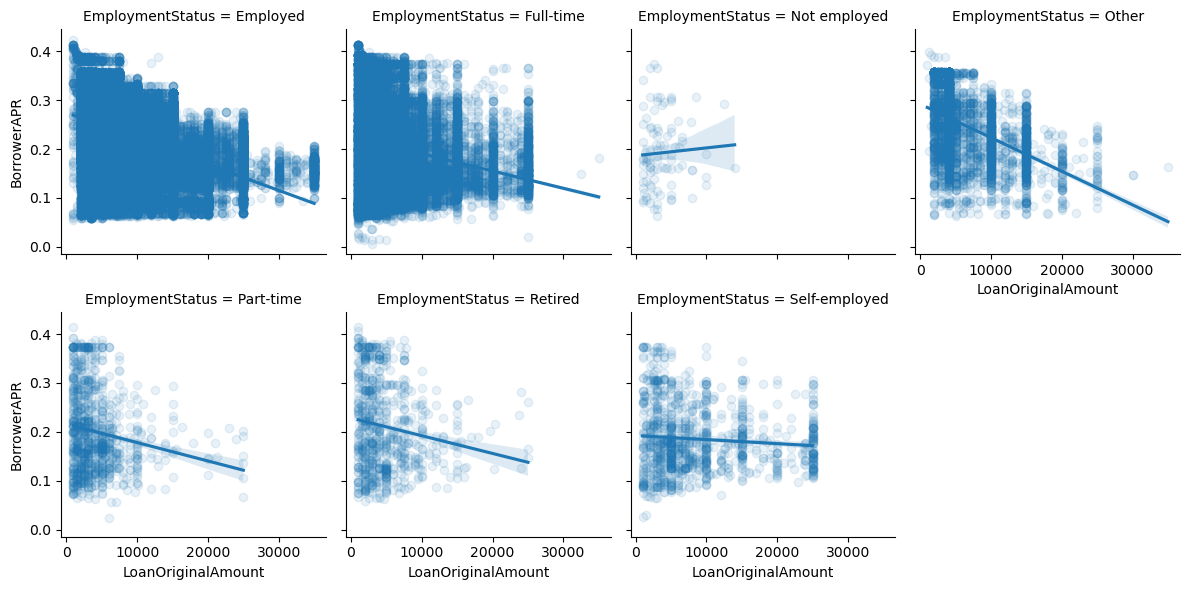

In [83]:
# Create facet plot for Employment Status and see if it has an effect on BorrowerAPR and Original Loan Amount
facet_plot = sns.FacetGrid(data = subset_df, col = 'EmploymentStatus', col_wrap = 4)
facet_plot.map(sns.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = .05, scatter_kws = {'alpha': 0.1});

<b>Observation: </b>Based on the facet plot, employment status apperas to have some effect on the relationship between LoanOriginalAmount and BorrowerAPR. However, the relationship doesn't seem to be significant. There is a negative relationship where employment status is employed, full-time, other, part-time, retired, and self-employed (strong negative relationship for employed, full-time, and other). There is a slgiht positive relationship when employment status is 'not-employed'. 

## Box and Whisker Plot Matrix
Next, I would like to see if term and employment status have any impact on BorrowerAPR

C:\Users\yijia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


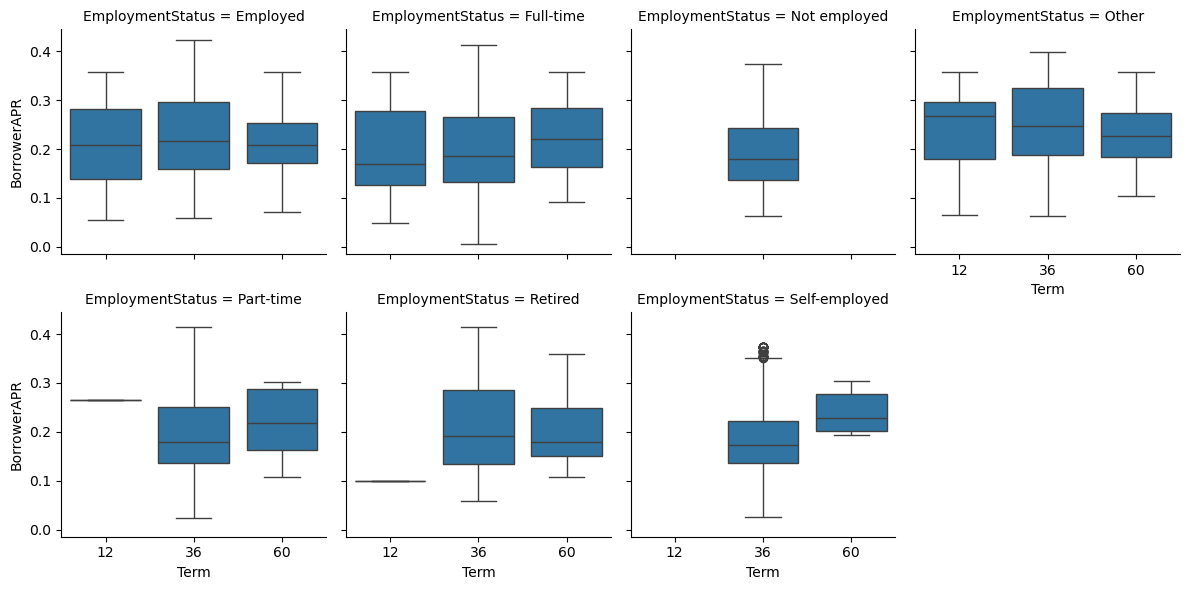

In [86]:
# Create box and whisker matrix 
g = sns.FacetGrid(data=subset_df, col='EmploymentStatus', col_wrap = 4)
g.map(sns.boxplot, 'Term', 'BorrowerAPR' );

<b>Observation: </b> From the box-and-whisker plot, it appears that 'Term' doesn't seem to have an effect on the relationship between Employment Status and BorrowerAPR. From the all plots, the median BorrowerAPR seems to be close to 0.2 regardless of the term length. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Term doesn't seem to strengthen the relationship of other features and the feature of interest (BorrowerAPR).
> Employment Status - Seems to play an impact in the relationship of other feature and the feature of interest (BorrowerAPR) as seen in the FacetPlot. Employment status appears to have a slight impact on the relationship between the original loan amount and BorrowerAPR. However, the effect seems to be small. Further testing will be needed to determine whether the effect is significant or not. 

### Were there any interesting or surprising interactions between features?

> An interesting interaction between features is that EmploymentStatus on an BorrowerAPR and the original loan amount. Especially when Employment status is 'other', there seems to be a slight positive correlation between BorrowerAPR and the original loan amount. By understanding what "Other" consists of in the employment status category will be interesting and why it produces a positive relationship, whereas all other Employment status displayed a negative correlation.

In [94]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_1_Data_Exploration.ipynb

[NbConvertApp] Converting notebook Part_1_Data_Exploration.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 1339802 bytes to Part_1_Data_Exploration.html
